# Import data
[Kaggle Dataset](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction)

In [1]:
# Importing necessary libraries
import pandas as pd

# Reading the dataset
df = pd.read_csv('Clean_Dataset.csv')

In [2]:
# Displaying the dataframe
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


### Getting the value counts of various columns

In [3]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [4]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [5]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [6]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [7]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

### Getting basic statistics of the 'duration' column


In [8]:
df['duration'].min()

0.83

In [9]:
df['duration'].max()

49.83

In [10]:
df['duration'].median()

11.25

## Preprocessin

In [11]:
# Dropping unnecessary columns
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

# Encoding the 'class' column to binary values (1 for Business, 0 for others)
df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

In [12]:
# Factorizing the 'stops' column
df.stops = pd.factorize(df.stops)[0]

In [13]:
# One-hot encoding categorical variables and dropping the original columns
df = df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source')).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest')).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival')).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure')).drop('departure_time', axis=1)

In [14]:
# Displaying the dataframe after preprocessing
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


## Training model

In [15]:
# Importing libraries for model training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop('price', axis=1), df.price

In [16]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
# Initializing the Random Forest Regressor
reg = RandomForestRegressor(n_jobs=-1)

In [18]:
# Training the model
reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [19]:
# Evaluating the model
reg.score(X_test, y_test)

0.9852267065078025

In [20]:
# Importing necessary metrics
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Making predictions on the test set
y_pred = reg.predict(X_test)

# Printing evaluation metrics
print('R2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))

R2:  0.9852267065078025
MAE:  1078.016104975723
MSE:  7652893.457192783
RMSE:  2766.386353565384


Text(0.5, 1.0, 'Prediction VS Actual Price')

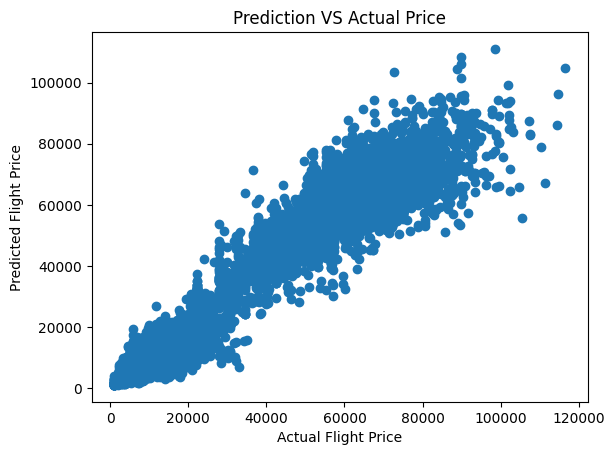

In [21]:
# Plotting the actual vs predicted prices
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction VS Actual Price')

In [22]:
# Getting feature importances from the model
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances

[('class', 0.8802243185896631),
 ('duration', 0.05740582555246991),
 ('days_left', 0.01860137935986301),
 ('airline_Vistara', 0.005458960086244351),
 ('airline_Air_India', 0.004448365589896736),
 ('source_Delhi', 0.0035039566395633124),
 ('dest_Delhi', 0.0033140887078177733),
 ('source_Mumbai', 0.0022310942014658434),
 ('dest_Mumbai', 0.0019262200994881189),
 ('dest_Kolkata', 0.0018614996265360608),
 ('stops', 0.001859088793839123),
 ('source_Kolkata', 0.0017923313161878718),
 ('dest_Hyderabad', 0.001528911253728459),
 ('arrival_Evening', 0.0015238517018485278),
 ('source_Hyderabad', 0.0012762438149116794),
 ('dest_Bangalore', 0.001159362444590644),
 ('arrival_Night', 0.0011473351432530598),
 ('departure_Evening', 0.0011251094579106118),
 ('source_Bangalore', 0.001117130080152844),
 ('arrival_Afternoon', 0.0009723886436043249),
 ('source_Chennai', 0.0009317823972139112),
 ('departure_Morning', 0.0008997414722435444),
 ('dest_Chennai', 0.0008572409338874008),
 ('departure_Night', 0.0008

<BarContainer object of 10 artists>

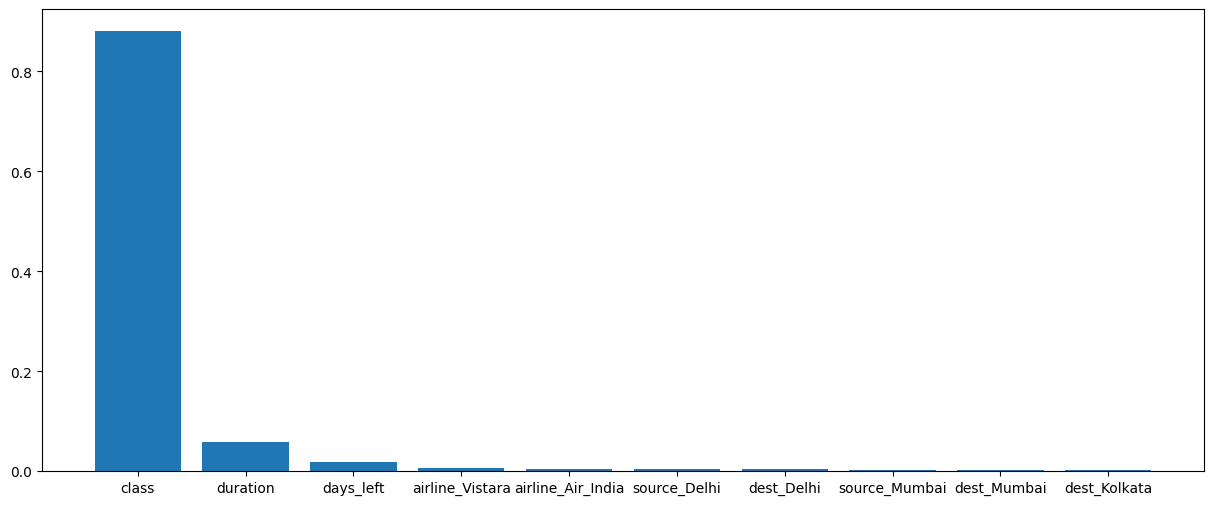

In [23]:
# Plotting the top 10 important features
plt.figure(figsize=(15, 6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

# Hyperparameter Tuning

### Grid Search for hyperparameter tuning

In [24]:
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20 , 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt']
}

grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Getting the best parameters from the grid search
best_params = grid_search.best_params_

### Randomized Search for hyperparameter tuning


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20 , 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1 ,5),
    'max_features': [1.0, 'log2', 'sqrt']
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3,
                                  scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [ ]:
# Evaluating the best estimator
best_regressor.score(X_test, y_test)

0.9863068235851901

In [ ]:
# Making predictions with the best estimator
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_regressor.predict(X_test)

# Printing evaluation metrics
print('R2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))

R2:  0.9863068235851901
MAE:  1080.9238493600396
MSE:  7044635.492707234
RMSE:  2654.1732220612944


Text(0.5, 1.0, 'Prediction VS Actual Price')

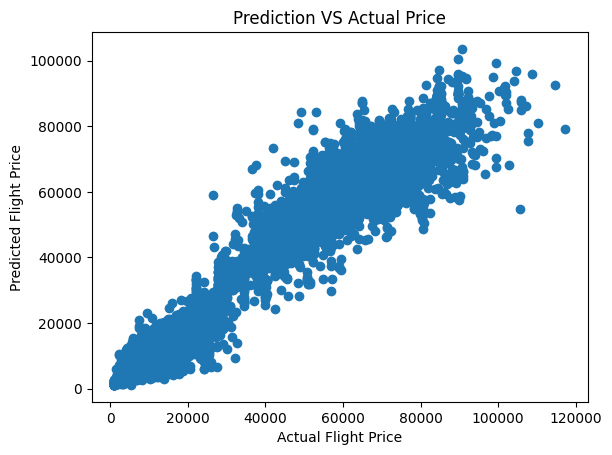

In [ ]:
# Plotting the actual vs predicted prices for the best estimator
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction VS Actual Price')